In [ ]:
import pandas as pd
import numpy as np

# Load the datasets
try:
    trips_df = pd.read_csv('truck_trips_usa_500k.csv')
    routes_df = pd.read_csv('truck_routes_usa_reference.csv')
except FileNotFoundError:
    print("Ensure that 'truck_trips_usa_500k.csv' and 'truck_routes_usa_reference.csv' are in the same directory.")
    # As a fallback for the environment, let's try to fetch from the provided file info
    trips_df = pd.read_csv('truck_trips_usa_500k.csv')
    routes_df = pd.read_csv('truck_routes_usa_reference.csv')


# --- 1. Summarization ---

# Aggregate the trip-level dataset into a route-level summary
route_summary = trips_df.groupby('route_id').agg(
    total_trips=('trip_id', 'count'),
    avg_distance_km=('distance_km', 'mean'),
    std_distance_km=('distance_km', 'std'),
    avg_duration_min=('duration_min', 'mean'),
    std_duration_min=('duration_min', 'std'),
    avg_load_tons=('load_tons', 'mean'),
    std_load_tons=('load_tons', 'std'),
    avg_cost_per_km_usd=('cost_per_km_usd', 'mean'),
    std_cost_per_km_usd=('cost_per_km_usd', 'std'),
    total_distance_km=('distance_km', 'sum'),
    total_cost_usd=('total_cost_usd', 'sum')
).reset_index()

# Merge with the routes reference data to get more details for each route
route_summary_df = pd.merge(route_summary, routes_df, on='route_id')

# Save the aggregated data to a CSV file
route_summary_df.to_csv('route_summary.csv', index=False)

# Display the first few rows of the aggregated data
print("Route Level Summary:")
print(route_summary_df.head())

Route Level Summary:
  route_id  total_trips  avg_distance_km  std_distance_km  avg_duration_min  \
0    US001         6444       346.008245         6.908718        354.642070   
1    US002         6393       153.029296         3.046762        158.071594   
2    US003         6538       361.982952         7.276569        319.230177   
3    US004         6449       708.099071        14.145702        684.322236   
4    US005         6448       499.182584        10.148606        494.308995   

   std_duration_min  avg_load_tons  std_load_tons  avg_cost_per_km_usd  \
0         27.176172      15.985931       2.576043             0.845192   
1         14.794602      16.040236       2.603661             0.728501   
2         24.426009      16.019550       2.585271             0.728478   
3         50.862161      16.096744       2.605449             0.845630   
4         37.122406      15.987756       2.588365             0.845663   

   std_cost_per_km_usd  ...        origin       destination

C:\Users\user\AppData\Local\Temp\ipykernel_18360\2557022566.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_trips', y='route_id', data=top_20_trips, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_18360\2557022566.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_cost_per_km_usd', y='route_id', data=top_20_cost, palette='plasma')


Visualizations for summarization have been created and saved as PNG files.


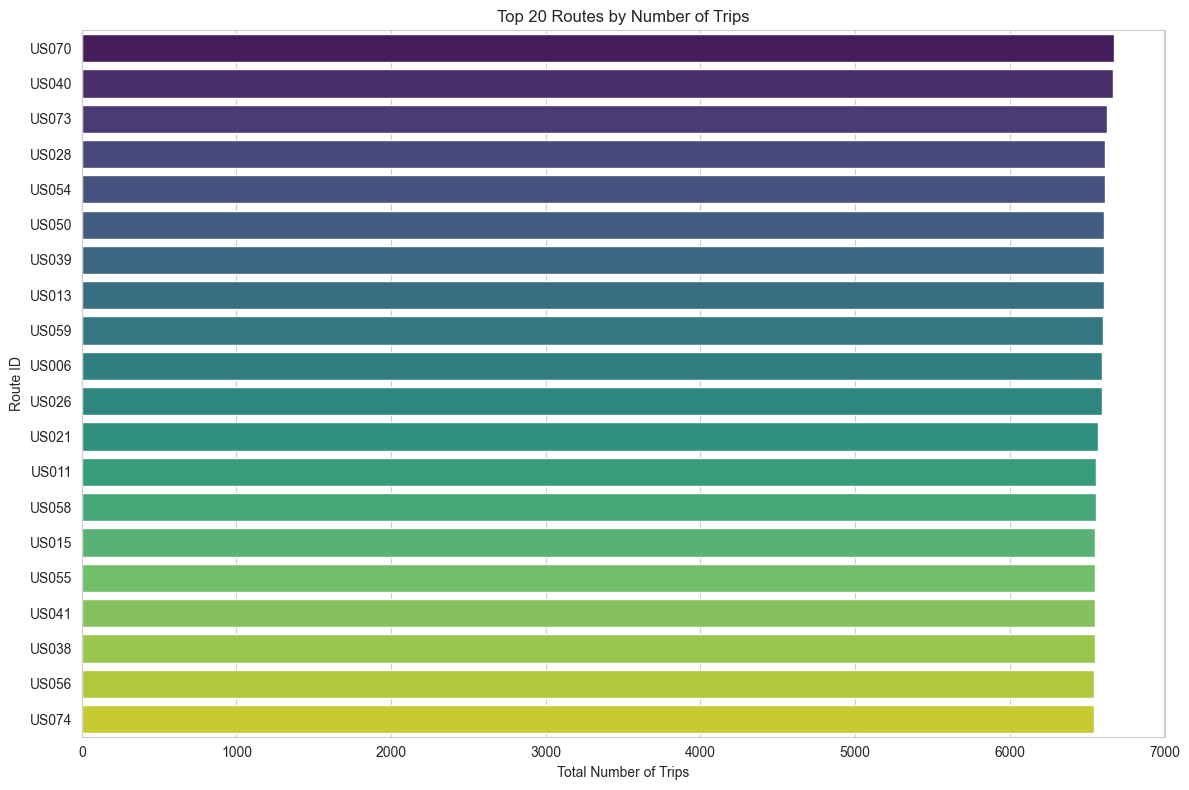

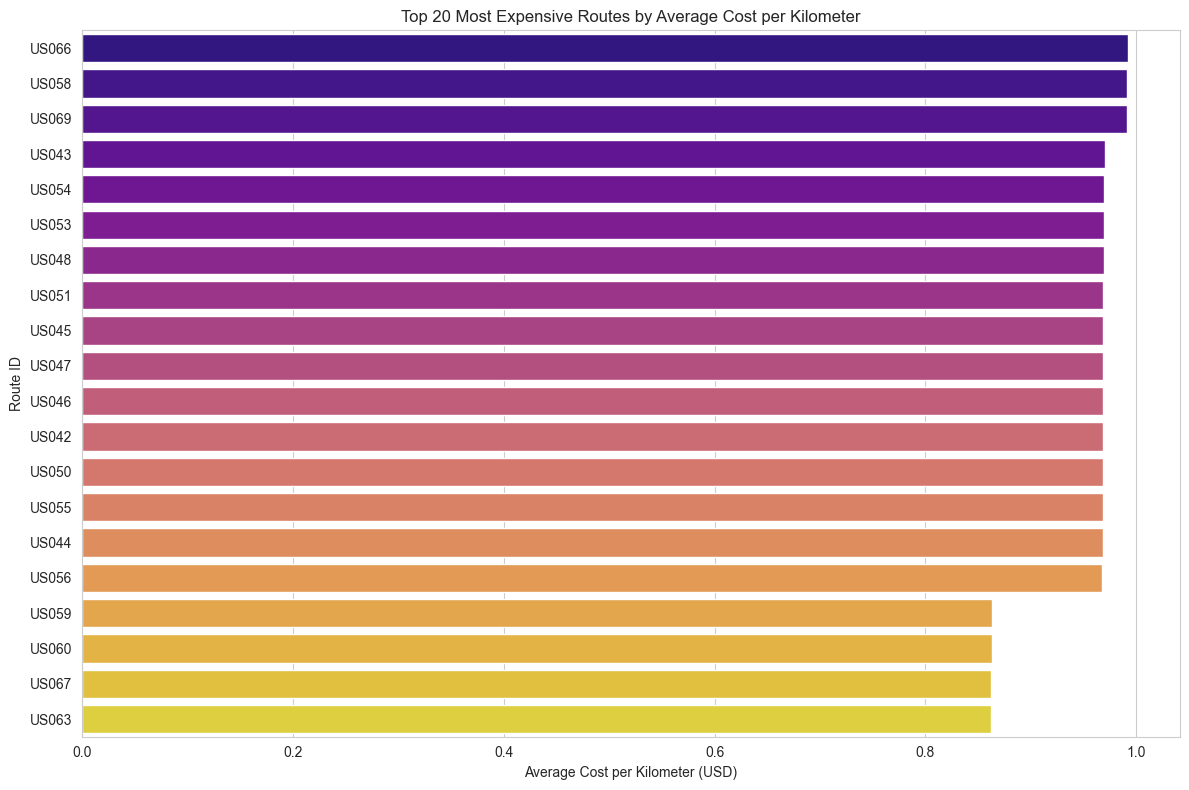

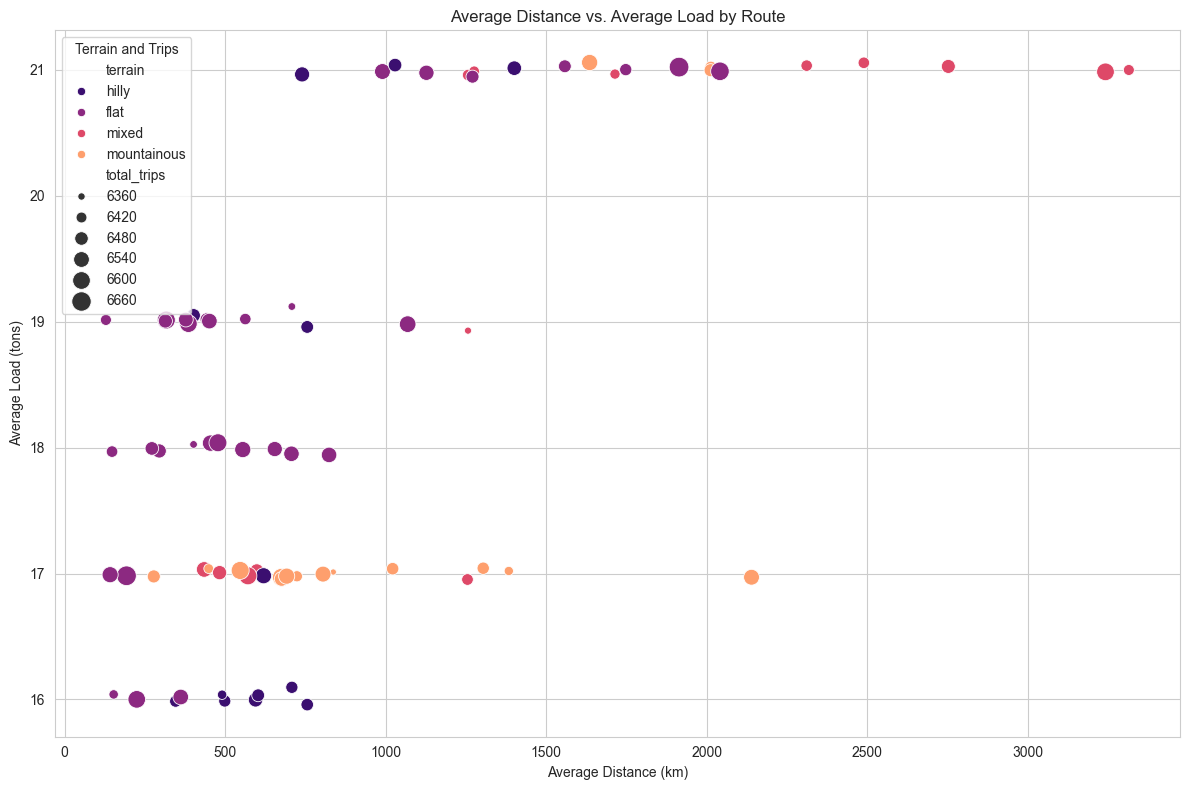

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# --- Visualizations for Summarization ---

# 1. Bar chart for the number of trips per route (Top 20)
top_20_trips = route_summary_df.sort_values(by='total_trips', ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x='total_trips', y='route_id', data=top_20_trips, palette='viridis')
plt.title('Top 20 Routes by Number of Trips')
plt.xlabel('Total Number of Trips')
plt.ylabel('Route ID')
plt.tight_layout()
plt.savefig('top_20_routes_by_trips.png')

# 2. Bar chart for average cost per kilometer by route (Top 20 most expensive)
top_20_cost = route_summary_df.sort_values(by='avg_cost_per_km_usd', ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_cost_per_km_usd', y='route_id', data=top_20_cost, palette='plasma')
plt.title('Top 20 Most Expensive Routes by Average Cost per Kilometer')
plt.xlabel('Average Cost per Kilometer (USD)')
plt.ylabel('Route ID')
plt.tight_layout()
plt.savefig('top_20_most_expensive_routes.png')

# 3. Scatter plot of average distance vs. average load
plt.figure(figsize=(12, 8))
sns.scatterplot(x='avg_distance_km', y='avg_load_tons', data=route_summary_df, hue='terrain', size='total_trips', sizes=(20, 200), palette='magma')
plt.title('Average Distance vs. Average Load by Route')
plt.xlabel('Average Distance (km)')
plt.ylabel('Average Load (tons)')
plt.legend(title='Terrain and Trips')
plt.tight_layout()
plt.savefig('distance_vs_load_scatter.png')

print("Visualizations for summarization have been created and saved as PNG files.")

C:\Users\user\AppData\Local\Temp\ipykernel_18360\1964981372.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='terrain', y='duration_min', data=trips_with_route_info_df, palette='Set2')
C:\Users\user\AppData\Local\Temp\ipykernel_18360\1964981372.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='terrain', y='cost_per_km_usd', data=trips_with_route_info_df, palette='Set2')
C:\Users\user\AppData\Local\Temp\ipykernel_18360\1964981372.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='cost_per_km_usd', data=trips_with_r

--- Most and Least Efficient Routes ---

Top 5 Most Efficient Routes (Lowest Cost per km):
   route_id             origin      destination  avg_cost_per_km_usd terrain
39    US040      San Diego, CA  Los Angeles, CA             0.701560    flat
40    US041  San Francisco, CA   Sacramento, CA             0.701595    flat
15    US016        Chicago, IL  Kansas City, MO             0.709642    flat
11    US012        Chicago, IL  Minneapolis, MN             0.709731    flat
14    US015        Chicago, IL    Cleveland, OH             0.709774    flat

Top 5 Least Efficient Routes (Highest Cost per km):
   route_id              origin  destination  avg_cost_per_km_usd      terrain
65    US066   San Francisco, CA   Denver, CO             0.991702  mountainous
57    US058     Los Angeles, CA   Denver, CO             0.990856  mountainous
68    US069        Portland, OR   Denver, CO             0.990611  mountainous
42    US043   San Francisco, CA  Seattle, WA             0.969730  mountainous

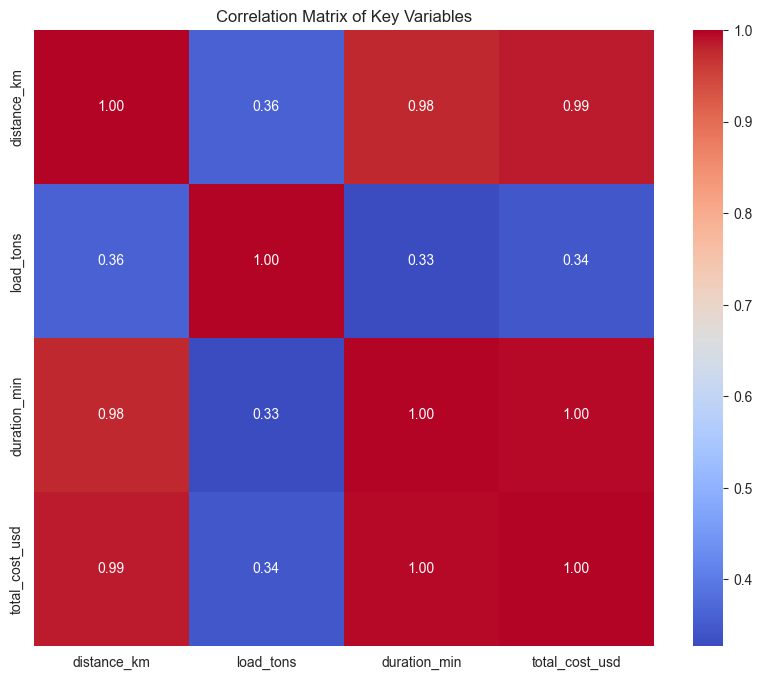

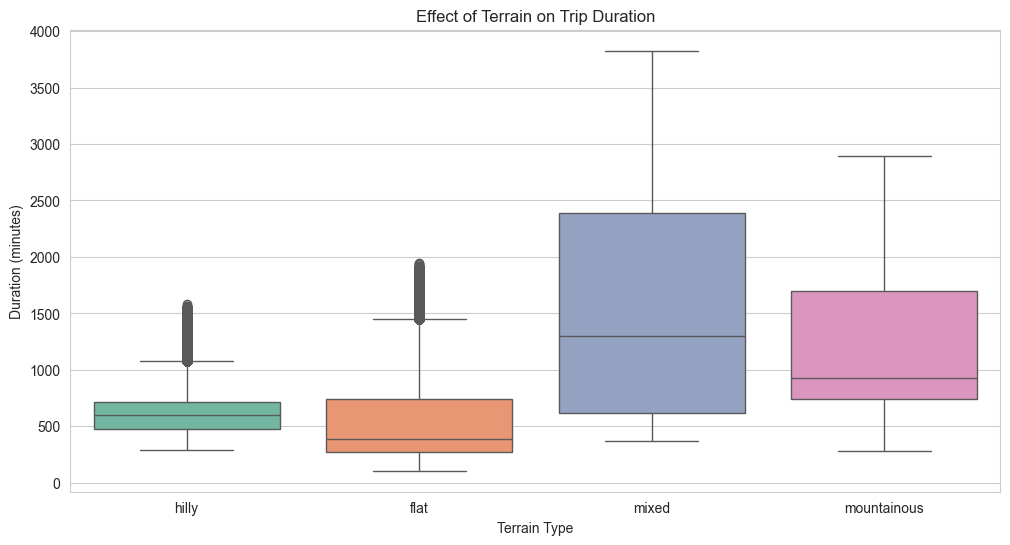

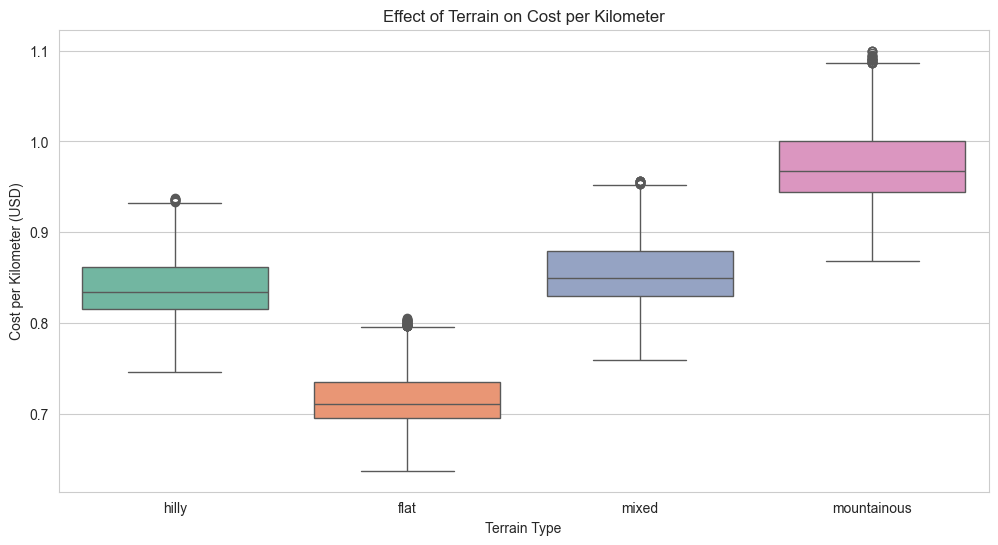

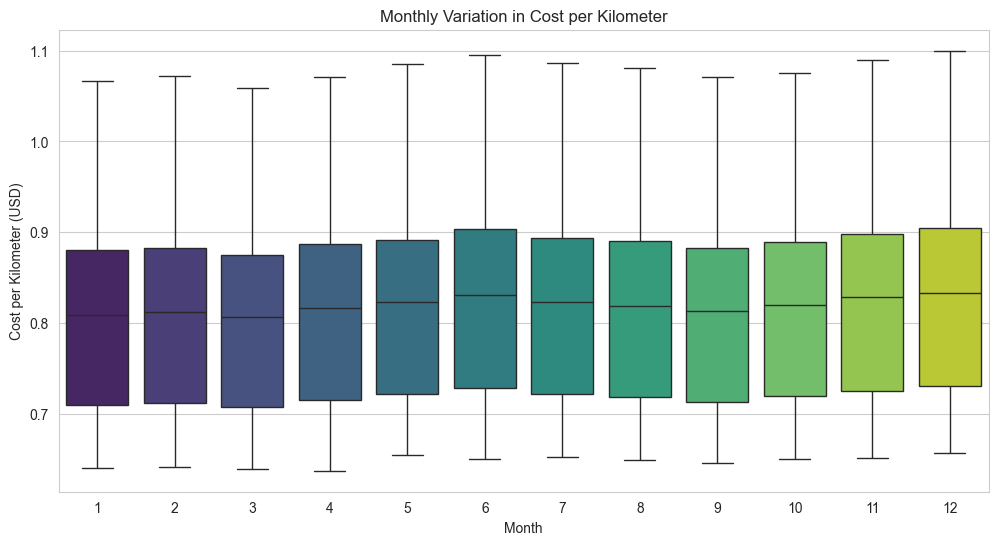

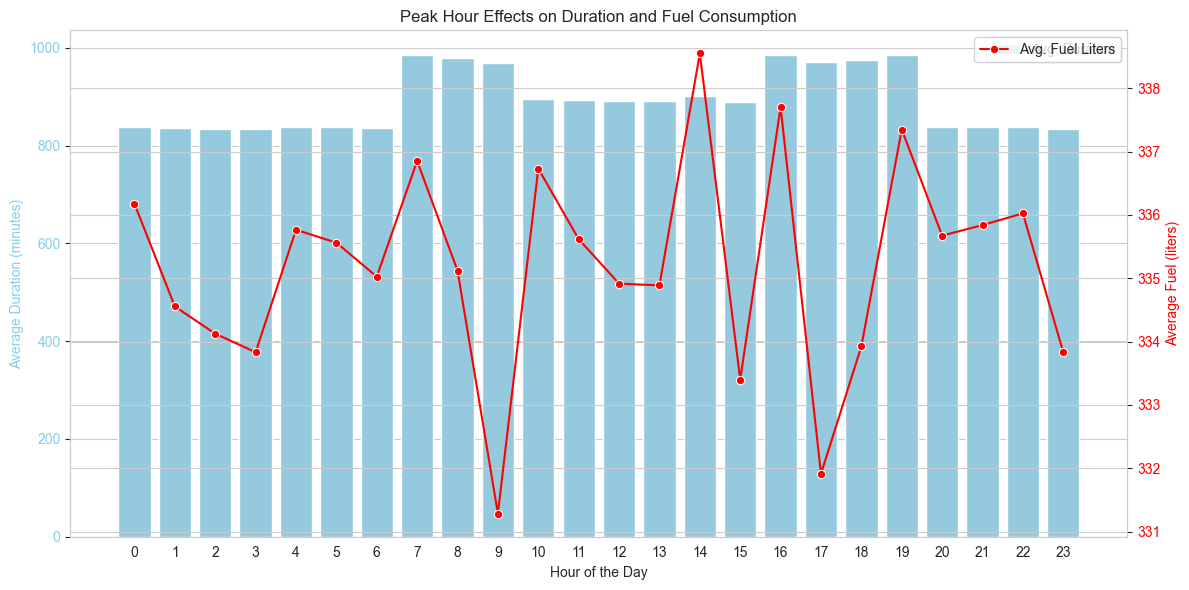

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
trips_df = pd.read_csv('truck_trips_usa_500k.csv')
routes_df = pd.read_csv('truck_routes_usa_reference.csv')

# Merge trips with routes to get terrain and other route-level info for each trip
trips_with_route_info_df = pd.merge(trips_df, routes_df, on='route_id')

# --- Exploratory Data Analysis (EDA) ---

# 1. Explore how distance, terrain type, and load affect duration and costs

# Correlation matrix
correlation_matrix = trips_with_route_info_df[['distance_km', 'load_tons', 'duration_min', 'total_cost_usd']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Variables')
plt.savefig('correlation_matrix.png')


# Boxplot for terrain vs. duration
plt.figure(figsize=(12, 6))
sns.boxplot(x='terrain', y='duration_min', data=trips_with_route_info_df, palette='Set2')
plt.title('Effect of Terrain on Trip Duration')
plt.xlabel('Terrain Type')
plt.ylabel('Duration (minutes)')
plt.savefig('terrain_vs_duration.png')

# Boxplot for terrain vs. cost per kilometer
plt.figure(figsize=(12, 6))
sns.boxplot(x='terrain', y='cost_per_km_usd', data=trips_with_route_info_df, palette='Set2')
plt.title('Effect of Terrain on Cost per Kilometer')
plt.xlabel('Terrain Type')
plt.ylabel('Cost per Kilometer (USD)')
plt.savefig('terrain_vs_cost.png')


# 2. Check for seasonal or temporal patterns

# Monthly cost variations
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='cost_per_km_usd', data=trips_with_route_info_df, palette='viridis')
plt.title('Monthly Variation in Cost per Kilometer')
plt.xlabel('Month')
plt.ylabel('Cost per Kilometer (USD)')
plt.savefig('monthly_cost_variation.png')

# Peak-hour effects on duration and fuel consumption
hourly_analysis = trips_with_route_info_df.groupby('hour_of_day').agg(
    avg_duration_min=('duration_min', 'mean'),
    avg_fuel_liters=('fuel_liters', 'mean')
).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average duration
sns.barplot(x='hour_of_day', y='avg_duration_min', data=hourly_analysis, color='skyblue', ax=ax1, label='Avg. Duration')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Average Duration (minutes)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Peak Hour Effects on Duration and Fuel Consumption')

# Line plot for average fuel consumption on the same graph
ax2 = ax1.twinx()
sns.lineplot(x='hour_of_day', y='avg_fuel_liters', data=hourly_analysis, color='red', marker='o', ax=ax2, label='Avg. Fuel Liters')
ax2.set_ylabel('Average Fuel (liters)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.savefig('peak_hour_effects.png')

# 3. Identify the most and least efficient routes
route_summary_df = pd.read_csv('route_summary.csv')
most_efficient_routes = route_summary_df.sort_values(by='avg_cost_per_km_usd', ascending=True).head(5)
least_efficient_routes = route_summary_df.sort_values(by='avg_cost_per_km_usd', ascending=False).head(5)

print("--- Most and Least Efficient Routes ---")
print("\nTop 5 Most Efficient Routes (Lowest Cost per km):")
print(most_efficient_routes[['route_id', 'origin', 'destination', 'avg_cost_per_km_usd', 'terrain']])

print("\nTop 5 Least Efficient Routes (Highest Cost per km):")
print(least_efficient_routes[['route_id', 'origin', 'destination', 'avg_cost_per_km_usd', 'terrain']])

print("\nEDA visualizations have been created and saved as PNG files.")


--- Cluster Analysis ---

Cluster Characteristics (Mean Values):
         avg_distance_km  avg_duration_min  avg_load_tons  \
cluster                                                     
0            1380.351928       1199.485023      20.844035   
1             424.054062        368.902240      18.121985   
2            2434.668566       2453.257640      20.572440   
3             682.776115        725.111090      16.895782   

         avg_cost_per_km_usd  total_trips  
cluster                                    
0                   0.784892  6491.214286  
1                   0.718448  6513.615385  
2                   0.917077  6488.444444  
3                   0.894992  6477.607143  

Number of routes in each cluster:
cluster
3    28
1    26
0    14
2     9
Name: count, dtype: int64

Clustering analysis is complete. Results and visualizations are saved.
The clustered data is saved to 'route_summary_with_clusters.csv'.


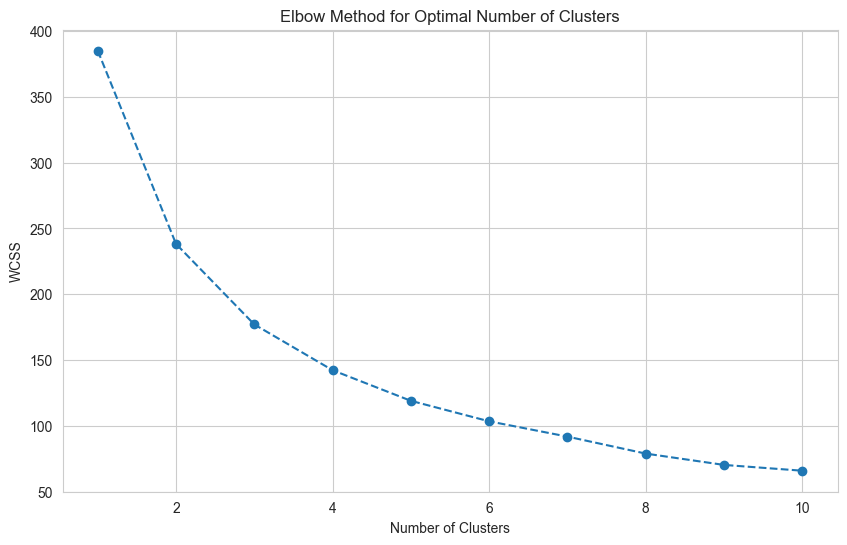

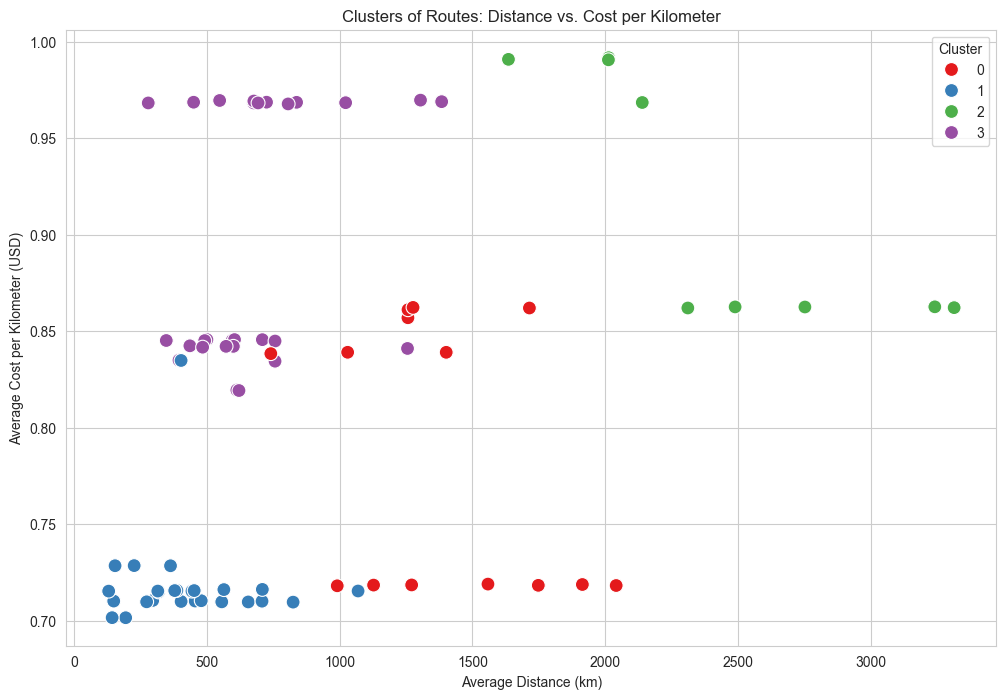

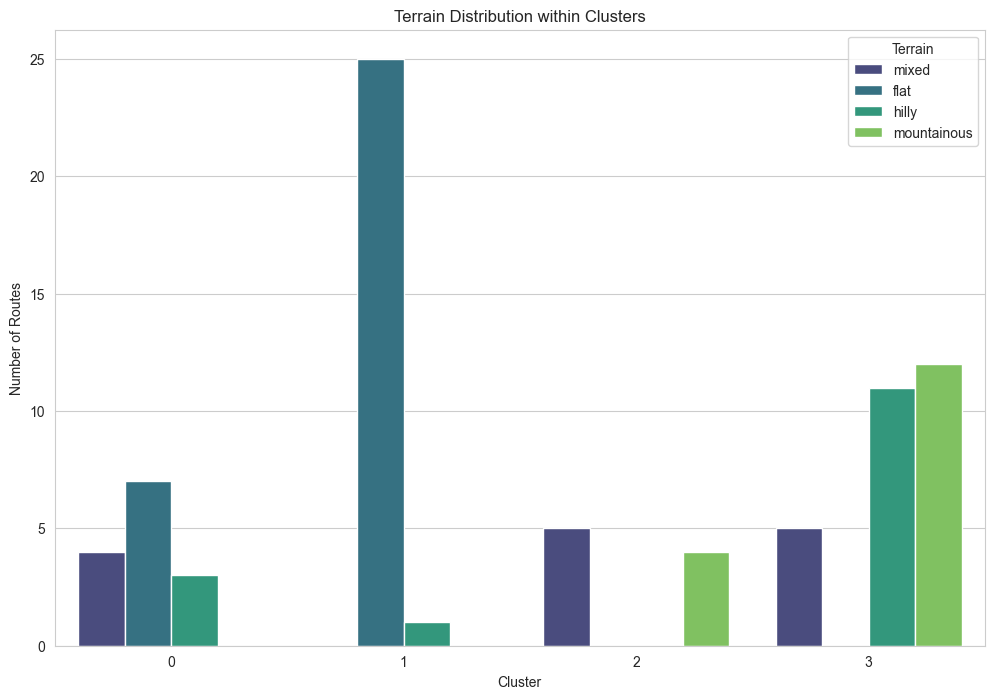

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the aggregated route summary data
route_summary_df = pd.read_csv('route_summary.csv')

# --- Clustering Analysis ---

# 1. Perform a clustering analysis

# Select features for clustering
features_for_clustering = route_summary_df[[
    'avg_distance_km',
    'avg_duration_min',
    'avg_load_tons',
    'avg_cost_per_km_usd',
    'total_trips'
]]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.savefig('elbow_method.png')


# From the elbow plot, let's choose 4 clusters.
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
route_summary_df['cluster'] = kmeans.fit_predict(scaled_features)

# 2. Interpret the clusters

# Analyze the characteristics of each cluster
cluster_analysis = route_summary_df.groupby('cluster')[[
    'avg_distance_km',
    'avg_duration_min',
    'avg_load_tons',
    'avg_cost_per_km_usd',
    'total_trips'
]].mean()

print("\n--- Cluster Analysis ---")
print("\nCluster Characteristics (Mean Values):")
print(cluster_analysis)


# Visualize the clusters
# Scatter plot of distance vs. cost, colored by cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(x='avg_distance_km', y='avg_cost_per_km_usd', hue='cluster', data=route_summary_df, palette='Set1', s=100)
plt.title('Clusters of Routes: Distance vs. Cost per Kilometer')
plt.xlabel('Average Distance (km)')
plt.ylabel('Average Cost per Kilometer (USD)')
plt.legend(title='Cluster')
plt.savefig('clusters_distance_vs_cost.png')


# Box plot of terrain distribution within clusters
plt.figure(figsize=(12, 8))
sns.countplot(x='cluster', hue='terrain', data=route_summary_df, palette='viridis')
plt.title('Terrain Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Routes')
plt.legend(title='Terrain')
plt.savefig('clusters_terrain_distribution.png')


# Count of routes in each cluster
print("\nNumber of routes in each cluster:")
print(route_summary_df['cluster'].value_counts())

# Save the clustered data to a CSV file
route_summary_df.to_csv('route_summary_with_clusters.csv', index=False)
print("\nClustering analysis is complete. Results and visualizations are saved.")
print("The clustered data is saved to 'route_summary_with_clusters.csv'.")